In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import prob_model_eval_utls as util

DATA_FLD = Path('../data/week6')

In [3]:
actual = DATA_FLD / 'WindData.csv'
prob_model_fps = list(DATA_FLD.glob('WindProbForecast_*.csv'))

In [7]:
power_sr = pd.read_csv(actual, index_col='TARGETdtm', parse_dates=True, usecols=['TARGETdtm','Power']).squeeze()
model_data = {fp.parts[-1]: pd.read_csv(fp, index_col='TARGETdtm', parse_dates=True).drop(columns='ISSUEdtm') for fp in prob_model_fps}

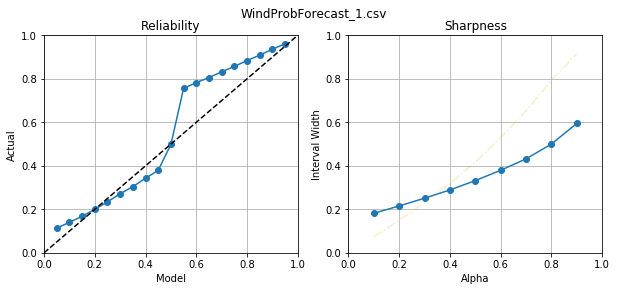

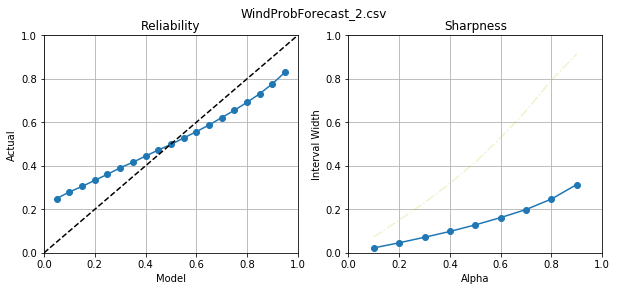

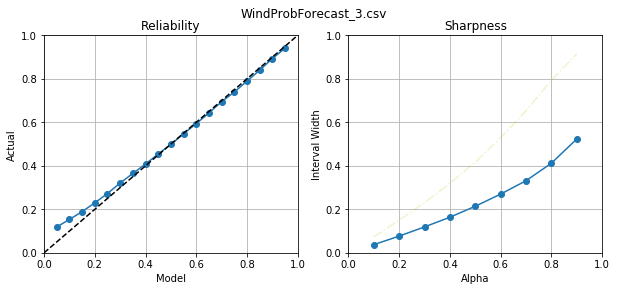

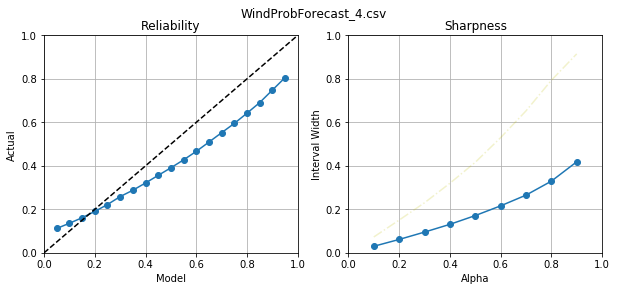

In [8]:
for fname, df in model_data.items():
    fig = util.eval_plots(df, power_sr, figsize=(10,4), title=fname)
#     fig.savefig(fname.replace('.csv', '') + '_evalplots.png')

###  Quantile Loss (sometimes called Pinball Loss)

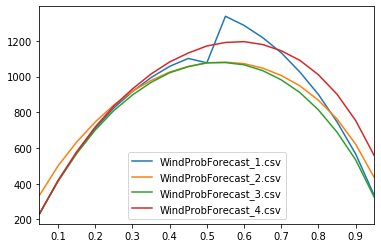

In [24]:
df_plot = pd.DataFrame()
for fname, df in model_data.items():
    res = {}
    for col in df:
        tau = int(col[1:])/100
        res[tau] = pinball_loss(y=power_sr, z=df[col], tau=tau)
    df_plot[fname] = pd.Series(res)

df_plot.plot()

# Resulting Decision:
I think the best model is the 3rd one since it's reliability is the best and the sharpness is quite good.

On the sharpness plot the dashed line represents the difference in quantiles on the whole dataset and it's there only as reference.

losses that I have not implemented:
- Continuous Rank Probability Score
- Log Score